In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
import pandas as pd

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
df['flower name'] = df.target.apply(lambda x:iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [4]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=10)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target','flower name'],axis = 'columns'), df['target'],test_size = 0.2)

In [6]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [7]:
y_predicted=model.predict(X_test)

In [8]:
model.score(X_test,y_test)

0.9

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[12,  0,  0],
       [ 0,  7,  2],
       [ 0,  1,  8]])

<AxesSubplot:>

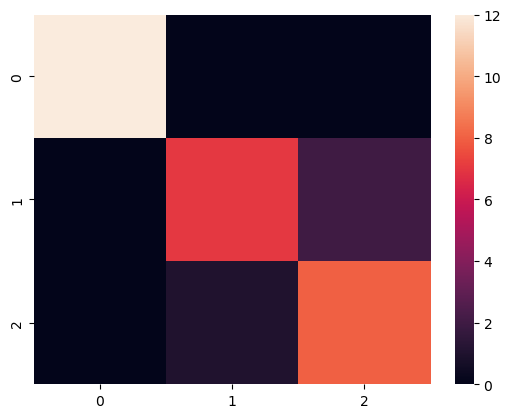

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(cm)